In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
#removing the warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# importing the excel sheet
xls = pd.ExcelFile('Rapido.xlsx')

In [3]:
# Selecting the first worksheet having Data
df = pd.read_excel(xls)

In [4]:
#creating a DataFrame
df= pd.DataFrame(df)

In [5]:
df.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,ID001,CUST_001,1546709270211,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37
1,ID002,CUST_002,1546709309524,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119
2,ID003,CUST_003,1546709331857,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27
3,ID004,CUST_004,1546709358403,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121
4,ID005,CUST_005,1546709386884,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58


In [8]:
df.dtypes

trip_id             object
customer_id         object
timestamp            int64
pick_lat           float64
pick_lng           float64
drop_lat           float64
drop_lng           float64
travel_distance    float64
travel_time        float64
trip_fare            int64
dtype: object

In [276]:
df.describe()

,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
count,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000
mean,17.427919,78.435542,17.427891,78.434897,5.094359,15.819835,53.872833
std,0.030049,0.053333,0.037722,0.054965,3.365008,23.462865,33.430462
min,17.330339,78.308258,12.921696,77.548103,-1.000000,0.022750,20.000000
25%,17.405327,78.386562,17.405660,78.385010,2.744500,8.428525,36.000000
50%,17.432136,78.438866,17.431213,78.438164,4.299000,13.126250,46.000000
75%,17.446777,78.480839,17.446907,78.480255,6.679500,20.111167,60.000000
max,17.529791,78.600647,17.736155,78.634804,52.801000,4134.388700,1670.000000


We can see that distace column has a error that the minimum value of distance is -1 which is not possible in real world.

In [16]:
#Checking for Null Values
df.isnull().sum()

trip_id            0
customer_id        0
timestamp          0
pick_lat           0
pick_lng           0
drop_lat           0
drop_lng           0
travel_distance    0
travel_time        0
trip_fare          0
dtype: int64

In [18]:
#Checking the DataTypes of all Columns
df.dtypes

trip_id             object
customer_id         object
timestamp            int64
pick_lat           float64
pick_lng           float64
drop_lat           float64
drop_lng           float64
travel_distance    float64
travel_time        float64
trip_fare            int64
dtype: object

In [32]:
#checking for other errors
df['travel_distance'].value_counts().head()

0.000    231
4.782     18
4.911     17
3.150     17
3.473     17
Name: travel_distance, dtype: int64

we can clearly see that there is a error in travel_distance column as it shows that there are 231 customers who have travelled zero distance. It means that either they have not travelled or they cancelled the ride. either we can drop these customers from dataset as dropping 231 records from 44000 records would not affect our Analysis much but it is better to replace them with the mean or median of the distance. And the error of value -1 can be neglected as it is only for one customer

## converting timestamp from epoch to DateTimeformat

In [174]:
df['timestamp']=df['timestamp']//1000

In [175]:
d=[]
import datetime
for i in range(0,df['timestamp'].count()):
    d.append(datetime.datetime.fromtimestamp(int(df['timestamp'][i])).strftime('%Y-%m-%d %H:%M:%S'))
df['newdatetime']=d

In [177]:
#splitting into Date and Time
s=df["newdatetime"].str.split(" ", n = 1, expand = True) 

In [178]:
df['Time']=s[1]
df['Date']=s[0]

In [179]:
#converting datetime from string to DateTime Format
from datetime import datetime
c=[]
for i in range(0,df['newdatetime'].count()):
    c.append(datetime.strptime(df['newdatetime'][i], '%Y-%m-%d %H:%M:%S'))
df['datetime']=c

In [181]:
#dropping unnecessary columns
df=df.drop('timestamp',axis=1)

In [182]:
df=df.drop('newdatetime',axis=1)

In [252]:
df.head()

,trip_id,customer_id,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare,Time,Date,datetime
0,ID001,CUST_001,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37,22:57:50,2019-01-05,2019-01-05 22:57:50
1,ID002,CUST_002,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119,22:58:29,2019-01-05,2019-01-05 22:58:29
2,ID003,CUST_003,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27,22:58:51,2019-01-05,2019-01-05 22:58:51
3,ID004,CUST_004,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121,22:59:18,2019-01-05,2019-01-05 22:59:18
4,ID005,CUST_005,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58,22:59:46,2019-01-05,2019-01-05 22:59:46


In [193]:
sam=df['customer_id'].value_counts()

In [209]:
#creating a list for customers with 2 or more than 2 rides
cust=[]
for i in range(0,sam.count()):
    if (sam.values[i]>=2):
        cust.append(sam.index[i])

In [212]:
print("The number of customers with 2 or more than two rides is : ",len(cust))

The number of customers with 2 or more than two rides is :  9130


# Exploratory Data Analysis

In [46]:
avg_dist=df['travel_distance'].mean()
print("The Average Distance travelled by customers is : ",avg_dist)

The Average Distance travelled by customers is :  5.09435936483726


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

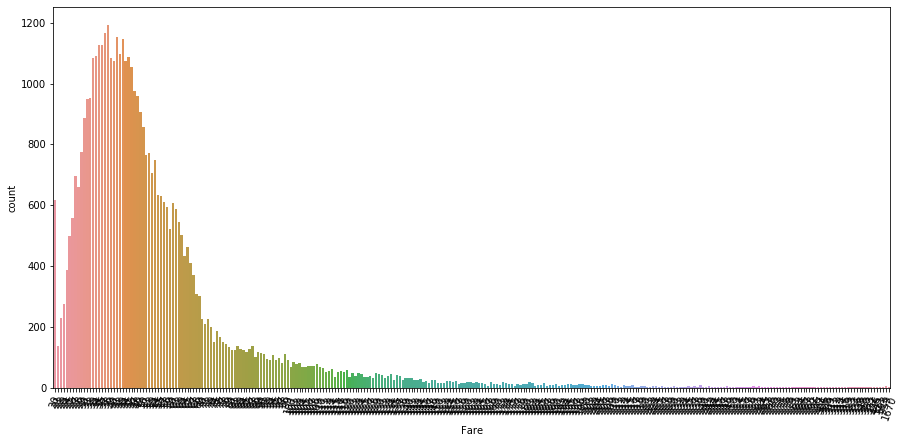

In [20]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='trip_fare',data=df)
plt.xlabel("Fare")
plt.xticks(rotation=70)

It is obvious and also can be seen from the data that most of the people book rapido bikes when the Fare is less and very few of them book the ride when the fare is high

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

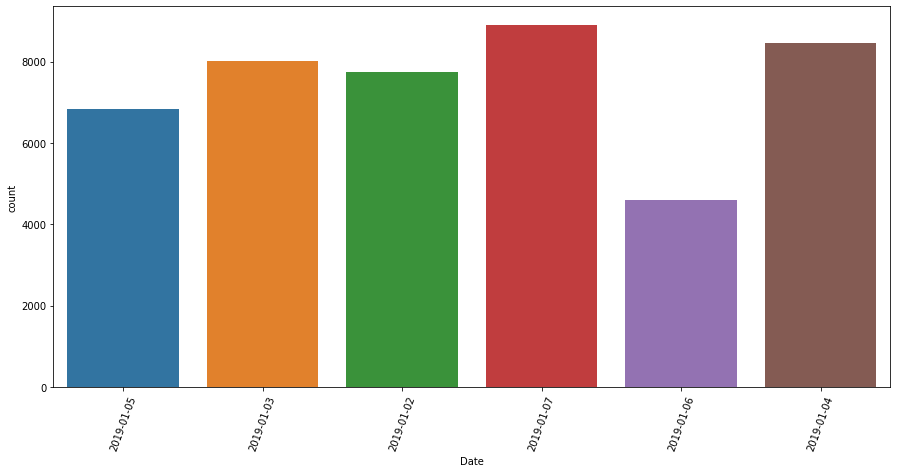

In [95]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='Date',data=df)
plt.xlabel("Date")
plt.xticks(rotation=70)

the graph above shows the number of rides in each day and it can be seen that very large number of people booked the bikes on 7 january 2019

In [42]:
#creating a function to plot different values
def plotting(y):
    a=[]
    b=[]
    x=y.value_counts()
    for i in range(0,x.count()):
        if x.values[i]>12:
            a.append(x.index[i])
            b.append(x.values[i])
    sns.barplot(a,b)

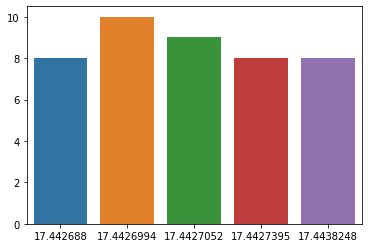

In [15]:
plotting(df['pick_lat'])

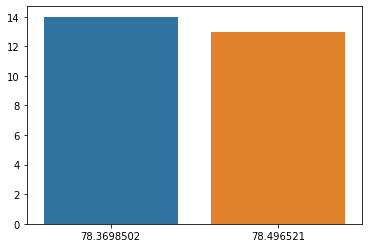

In [33]:
plotting(df['pick_lng'])

Two graph above show the latitude and longitude of the most frequent pick up locations. so the company should invest more near these areas which will help to increase the revenue for the company. 

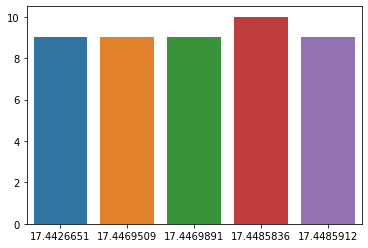

In [41]:
plotting(df['drop_lat'])

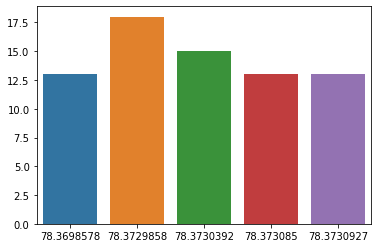

In [45]:
plotting(df['drop_lng'])

The graphs above shows the latitude and longitude of drop locations where maximum people go

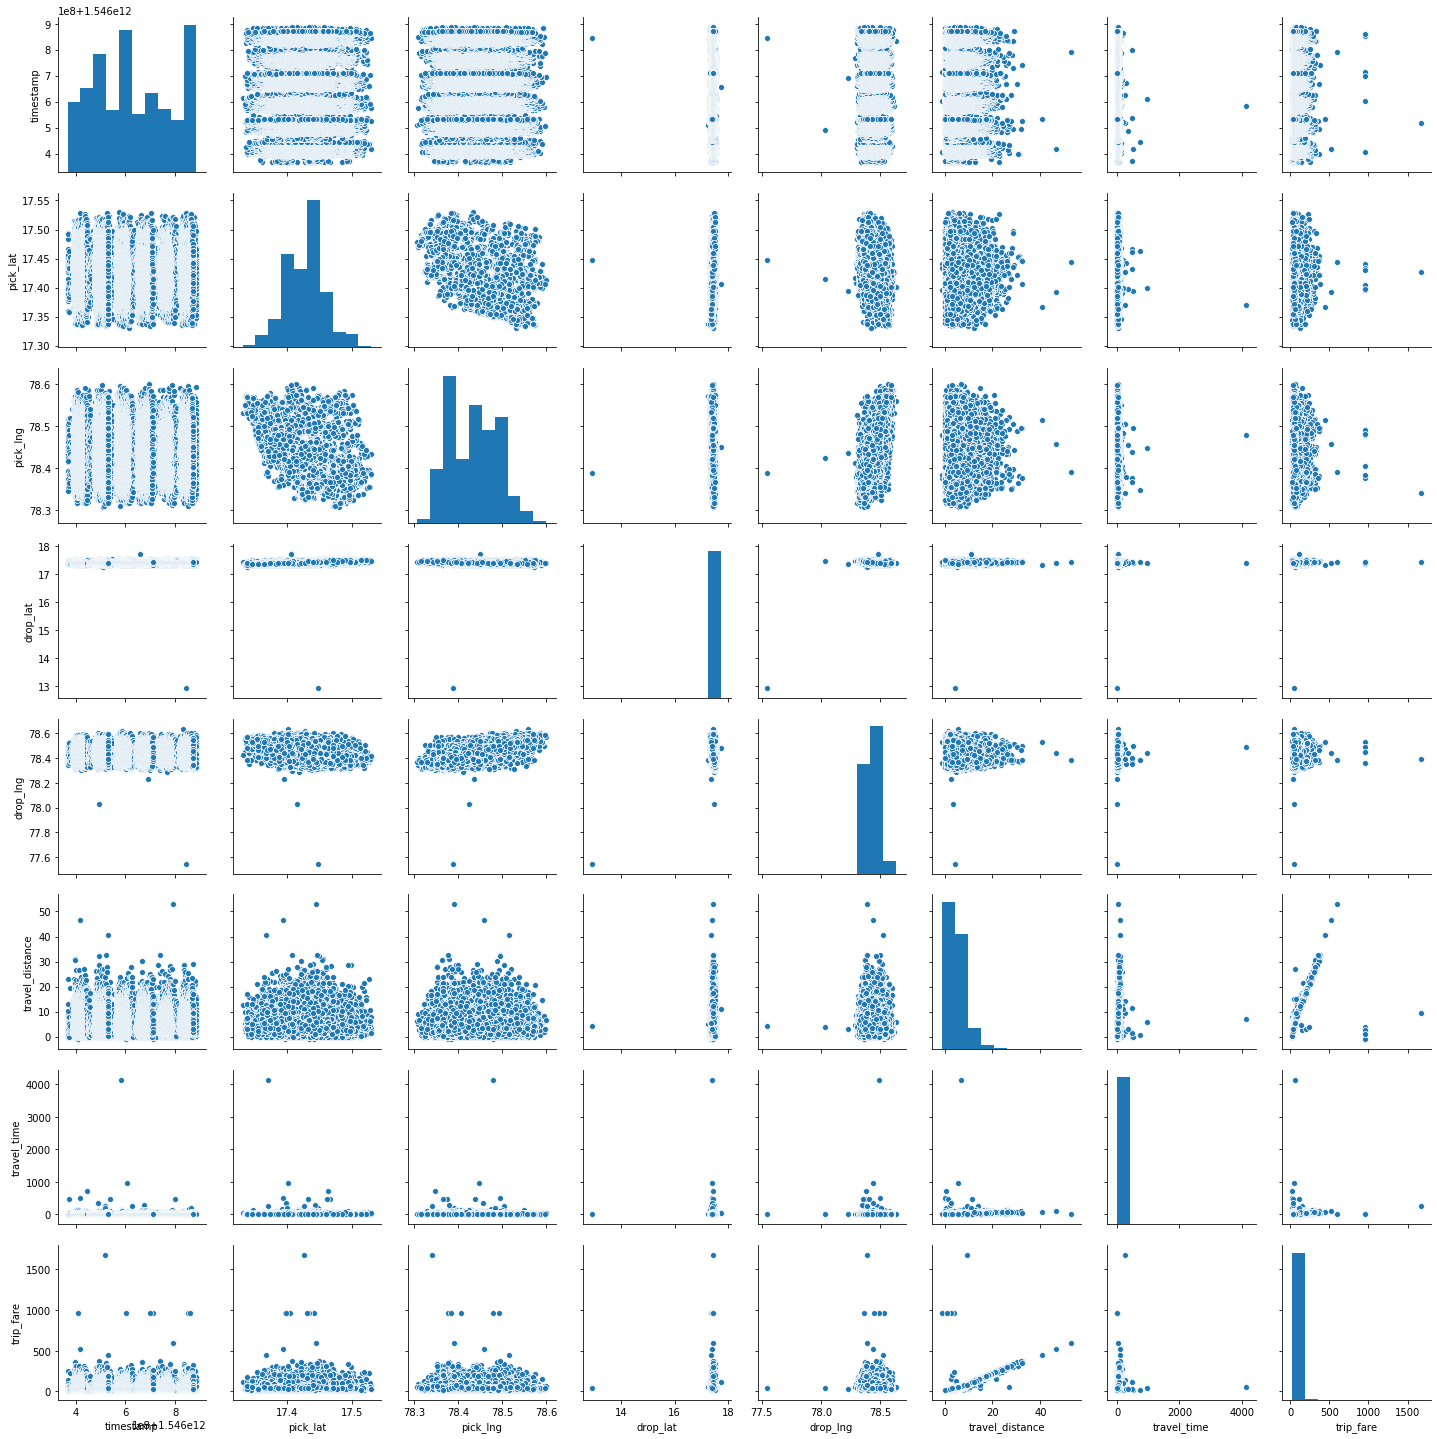

In [47]:
sns.pairplot(df)

The above graph shows the plots between all different columns in the dataset with each other. There is not much relation between the columns. But there seems to be some linear relation between trip_fare and travel_distance. which is very intuitive that when the travel distance increases, the fare also increases

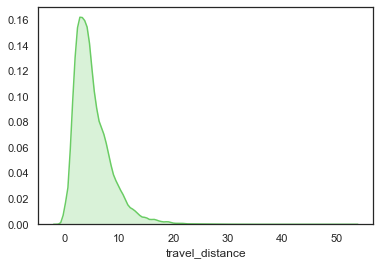

In [18]:
sns.distplot(df['travel_distance'], hist=False, color="g", kde_kws={"shade": True})
#ns.plt.xlim(0, 10)

The graph above shows the distribution of the travel distance. The distribution looks approximately a gaussian distribution. but it has a long tail. we can see that most of the customers travel a distance below 10 kms. But there are a dew of them who travel in between 10 to 20  kilometres and very few of people travel a distance greater than that.

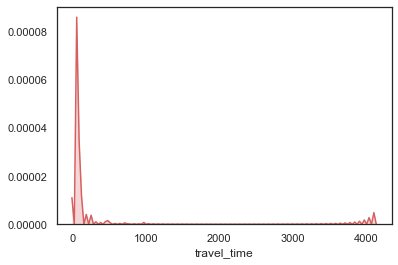

In [22]:
sns.distplot(df['travel_time'], hist=False, color="r", kde_kws={"shade": True})

The graph above shows the distribution of of travel times of all the customers. It can be seen that most of the customers have a very short travel duration. But a very surprising result is seen in this plot that there are very few people who have a travel time of approx 4000 minutes. It is a great achievement for the company that people booked Rapido to travel for such a long duration. 

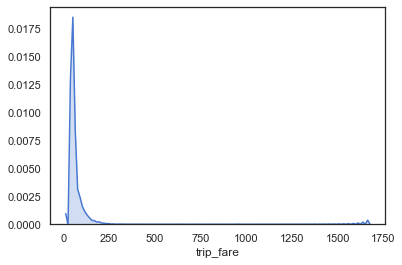

In [31]:
sns.distplot(df['trip_fare'], hist=False, color="b", kde_kws={"shade": True})

The above graph shows the distribution of fare. it can be seen that maximum people travel on rides which have low fare. but surprisingly some people have also booked the bike for a fare of more than 1500

In [23]:
df.var()

timestamp          2.306401e+16
pick_lat           9.029522e-04
pick_lng           2.844357e-03
drop_lat           1.422921e-03
drop_lng           3.021163e-03
travel_distance    1.132328e+01
travel_time        5.505061e+02
trip_fare          1.117596e+03
dtype: float64

The variance of different columns can be seen above. Most of the columns do not have much of variance. but the travel_distance and trip_fare have a lot of variance. which can be attributed to the customers who booked the rapido bikes for lond distances which can be seen from the distribution plots above

In [25]:
df.mean()

timestamp          1.546632e+12
pick_lat           1.742792e+01
pick_lng           7.843554e+01
drop_lat           1.742789e+01
drop_lng           7.843490e+01
travel_distance    5.094359e+00
travel_time        1.581983e+01
trip_fare          5.387283e+01
dtype: float64

The mean of columns can be seen above. it is seen that the means look fine for all the columns

# Correlation

In [6]:
corrmat=df.corr()

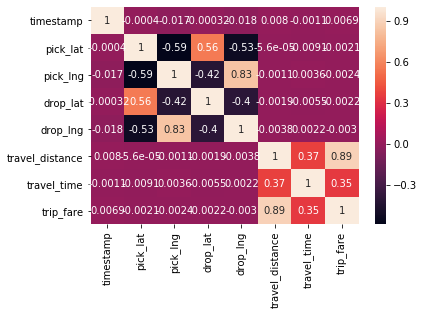

In [11]:
sns.heatmap(corrmat, annot=True)

The correlations between different columns can be seen from the heatmap above. travel_distance and trip_fare seems to have the most positive correlatin. And pick_lat and pick_lng have the most negative correlation.

# Model Fitting

In [126]:
df1=pd.DataFrame(list(zip(df['travel_time'],df['travel_distance'])),columns=['time','distance']) 
y=df['trip_fare']

In [127]:
#splitting the dataframe into test and train
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df1,y, test_size=0.33, random_state=42)

## Using SVM model

In [129]:
from sklearn import svm
svm_model = svm.SVR()
svm_model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
svm_pred = svm_model.predict(X_valid)

In [53]:
from sklearn.metrics import accuracy_score
print("The accuracy in general is : ", accuracy_score(y_valid,svm_pred))

The accuracy in general is :  0.1620225635449232


## Using lightGBM

In [58]:
import lightgbm as lgb

In [59]:
lgb_classifier = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=40, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [60]:
lgb_classifier.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=40, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [61]:
lgb_pred = lgb_classifier.predict(X_valid)

In [68]:
from sklearn.metrics import accuracy_score
print("The accuracy in general is : ", accuracy_score(y_valid,pd.Series(lgb_pred)))

The accuracy in general is :  0.030787005572923746


## Using Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression()

In [70]:
logistic_regressor.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
log_regression_pred = logistic_regressor.predict(X_valid)

In [72]:
from sklearn.metrics import accuracy_score
print("The accuracy in general is : ", accuracy_score(y_valid,log_regression_pred))

The accuracy in general is :  0.07034117167323638


As we can see aboe that the SVM Model has more accuracy as compared to other models. so we will try to predict the value of Fare using SVM model.

In [169]:
#creating the dataframe for predicting
data = [[15.0,3.5]]
cee=pd.DataFrame(data, columns = ['time', 'distance'])

In [170]:
 svm_model.predict(cee)

array([41.25163967])

we can see that the fare for a ride of 15 minutes and a distance of 3.5 kms is predicted to be around 41 rupees

## Top Clusters

In [254]:
#creating pairs of latitude and longitude for starting point and end point of a trip
df3 = df.pick_lat.astype(str) +','+df.pick_lng.astype(str)+" To "+df.drop_lat.astype(str) +','+df.drop_lng.astype(str)

In [261]:
df4=df3.value_counts().head()

In [267]:
v=df4.index
w=df4.values

In [273]:
df5=pd.DataFrame(list(zip(v, w)), 
               columns =['Pair', 'Total_trips']) 

In [275]:
df5

,Pair,Total_trips
0,"17.4807854,78.555748 To 17.4807854,78.555748",2
1,"17.4546833,78.3716431 To 17.4546833,78.3716431",2
2,"17.496027,78.3969498 To 17.4897118,78.4206467",1
3,"17.4484138,78.3935699 To 17.4470711,78.3728409",1
4,"17.4126053,78.4448853 To 17.4267254,78.4150543",1


This gives us the locations of starting point and end point where maximum trips happened within these 6 Days.